In [13]:
import pandas as pd
from DS_detector import scan_pix
from DS_Planck_Unet import unet_planck
import numpy as np
from matplotlib import pyplot as plt
from DS_healpix_fragmentation import one_pixel_fragmentation, matr2dict, draw_circles_h

In [2]:
thr_list = [0.1 * x for x in range(9, 0, -1)]

In [3]:
model = unet_planck(weights='/home/rt2122/Models/planck_z/model.ep0208-vl0.026899-l0.003223.h5')

In [4]:
res_table, clusters = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6, 
                               thr_list=[0.1])

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
res_table

,tp,tn,fp,fn,thr,pix2
0,10,63,360,30,0.1,6


In [6]:
clusters

,Name,RA,DEC,z,MSZ,MCXC,RedMAPPer
34,PSZ2 G121.13+49.64,195.886937,67.441544,0.221000,3.172016,,RMJ130240.3+672841.0
35,PSZ2 G121.77+51.75,194.572283,65.359959,0.233215,3.982594,,RMJ125827.8+652131.1
6,PSZ2 G097.72+38.12,248.977644,66.202314,0.170900,6.585151,J1635.8+6612,
10,PSZ2 G099.48+55.60,217.148540,56.876584,0.105100,2.811942,J1428.4+5652,RMJ142838.4+565139.0
16,PSZ2 G105.76+54.73,212.589738,59.680120,0.316000,4.414105,J1410.2+5942,RMJ141016.8+594254.7
22,PSZ2 G109.97+52.84,209.935597,62.527950,0.325900,4.814389,J1359.8+6231,RMJ135950.6+623105.5
23,PSZ2 G110.98+31.73,256.100465,78.632469,0.058100,6.210739,J1703.8+7838,
24,PSZ2 G112.48+56.99,203.993239,59.220971,0.070100,2.991135,J1336.1+5912,RMJ133608.3+591223.2
25,PSZ2 G113.81+44.35,213.533223,71.282293,0.225000,4.627713,J1414.2+7115,
31,PSZ2 G118.58+28.57,261.230797,85.891243,0.178000,5.982977,J1723.7+8553,


In [8]:
matr = one_pixel_fragmentation(2, 6, 10)

In [9]:
mdict = matr2dict(matr)

In [19]:
found_cl_pic = draw_circles_h(clusters['RA'], clusters['DEC'], 
                              np.ones(clusters.shape[0]),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1])

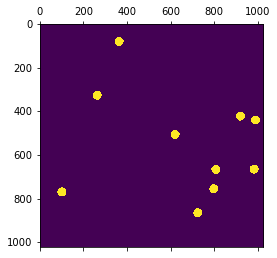

In [16]:
plt.matshow(pic)

In [17]:
planck_z = pd.read_csv('/home/rt2122/Data/clusters/planck_z.csv')

In [20]:
all_cl_pic = draw_circles_h(planck_z['RA'], planck_z['DEC'], 
                              np.ones(planck_z.shape[0]),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1])

In [23]:
grids = np.zeros(found_cl_pic.shape)
for i in range(0, grids.shape[0], 64):
    grids[i,:,0] = 1
    grids[i+1,:,0] = 1
    grids[:,i,0] = 1
    grids[:,i+1,0] = 1

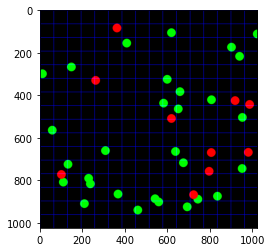

In [25]:
plt.imshow(np.dstack([found_cl_pic, all_cl_pic-found_cl_pic, grids]))

In [26]:
res_table, clusters = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6, 
                               thr_list=[0.1], step=16)

/home/rt2122/L/git/data-segmentation-2/modules/DS_detector.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  thr_dict[thr].extend(list(matrs[i][[new_cen[:, 0], new_cen[:, 1]]]))
/home/rt2122/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
found_cl_pic = draw_circles_h(clusters['RA'], clusters['DEC'], 
                              np.ones(clusters.shape[0]),
                    nside=2048, mdict=mdict, shape=list(matr.shape)+[1])

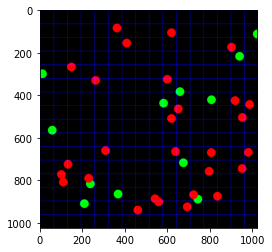

In [28]:
plt.imshow(np.dstack([found_cl_pic, all_cl_pic-found_cl_pic, grids]))

In [ ]:
res_table, clusters = scan_pix('/home/rt2122/Data/clusters/planck_z.csv', model, 6, 
                               thr_list=[0.1], step=8)